<a href="https://colab.research.google.com/github/gdhivya2302/Placement-prediction/blob/coding/movies_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('ratings.csv')
df1=pd.read_csv('tags.csv')
df2=pd.read_csv('movies.csv')
df3=pd.read_csv('links.csv')

In [3]:
#ratings shape
df.shape

(85271, 4)

In [70]:
#movies shape
df2.shape

(9742, 3)

In [36]:
df3.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [34]:
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [24]:
df1.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [23]:
df2.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
input=df['userId'].unique()
print("Count of unique elements- ",len(np.unique(input)))

Count of unique elements-  554


In [26]:
matrix_movie_id = df2[df2['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]

# Filter tags for the specific movieId
matrix_tags = df1[df1['movieId'] == matrix_movie_id]['tag']

# Convert the result to a list if needed
matrix_tags_list = matrix_tags.tolist()

# Print the result
print("Tags submitted by users for 'Matrix, The (1999)':", matrix_tags_list)

Tags submitted by users for 'Matrix, The (1999)': ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [28]:
terminator_movie_id = df2[df2['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]


terminator_ratings = df[df['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating = terminator_ratings.mean()

# Print the result
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


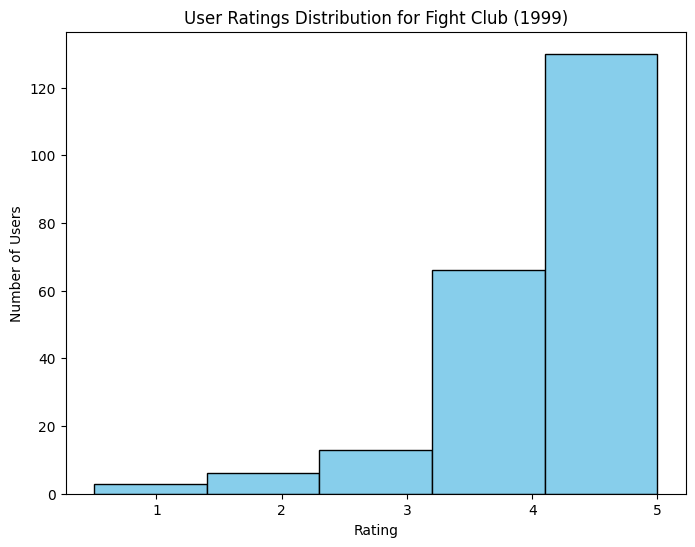

In [33]:
import matplotlib.pyplot as plt
fight_club_movie_id = df2[df2['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

# Filter ratings for the specific movieId
fight_club_ratings = df[df['movieId'] == fight_club_movie_id]['rating']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=5, color='skyblue', edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [37]:
average_ratings = df.groupby('movieId')['rating'].mean()

# Find the movie with the highest average rating
most_popular_movie_id = average_ratings.idxmax()

# Get the movie title based on the movieId
most_popular_movie_title = df2[df2['movieId'] == most_popular_movie_id]['title'].iloc[0]

# Get the actual average rating for the most popular movie
most_popular_movie_average_rating = average_ratings.max()

# Print the result
print("The most popular movie based on average user ratings is:")
print("Title:", most_popular_movie_title)
print("Average Rating:", most_popular_movie_average_rating)

The most popular movie based on average user ratings is:
Title: Lamerica (1994)
Average Rating: 5.0


In [69]:


# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for better clarity
grouped_ratings.columns = ['num_ratings', 'avg_rating']

# Step 2: Apply inner join on movies.csv and the grouped ratings DataFrame
merged_df = pd.merge(movies_df, grouped_ratings, left_on='movieId', right_index=True, how='inner')

# Step 3: Filter movies with more than 50 user ratings
popular_movies = merged_df[merged_df['num_ratings'] > 50]


most_popular_movie = popular_movies.loc[popular_movies['avg_rating'].idxmax()]

# Print the result
print("The most popular movie based on average user ratings (with more than 50 ratings) is:")
print("Title:", most_popular_movie['title'])
print("Average Rating:", most_popular_movie['avg_rating'])


The most popular movie based on average user ratings (with more than 50 ratings) is:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


In [68]:


# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for better clarity
grouped_ratings.columns = ['num_ratings', 'avg_rating']

# Step 2: Apply inner join on movies.csv and the grouped ratings DataFrame
merged_df = pd.merge(movies_df, grouped_ratings, left_on='movieId', right_index=True, how='inner')

# Step 3: Sort movies by the number of user ratings in descending order
sorted_movies = merged_df.sort_values(by='num_ratings', ascending=False)

# Step 4: Select the top 5 popular movies based on the number of user ratings
top_5_popular_movies = sorted_movies.head(5)

# Print the result
print("Top 5 popular movies based on the number of user ratings are:")
print(top_5_popular_movies[['title', 'num_ratings']])


Top 5 popular movies based on the number of user ratings are:
                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1939                Matrix, The (1999)          278


In [40]:
import pandas as pd

# Load DataFrames from CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for better clarity
grouped_ratings.columns = ['num_ratings', 'avg_rating']

# Step 2: Apply inner join on movies.csv and the grouped ratings DataFrame
merged_df = pd.merge(movies_df, grouped_ratings, left_on='movieId', right_index=True, how='inner')

# Step 3: Filter Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Step 4: Sort Sci-Fi movies by the number of user ratings in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='num_ratings', ascending=False)

# Step 5: Select the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Print the result
print("The third most popular Sci-Fi movie based on the number of user ratings is:")
print("Title:", third_most_popular_sci_fi_movie['title'])
print("Number of User Ratings:", third_most_popular_sci_fi_movie['num_ratings'])


The third most popular Sci-Fi movie based on the number of user ratings is:
Title: Jurassic Park (1993)
Number of User Ratings: 238


In [56]:
pip install IMDbPY

In [58]:
import pandas as pd

# Load DataFrame from CSV file
df3 = pd.read_csv('links.csv')
df3.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [61]:
merged_df = pd.merge(df, df3, on='movieId', how='inner')
merged_df = pd.merge(merged_df, df2, on='movieId', how='inner')

# Calculate average rating for each movie
average_ratings = merged_df.groupby('movieId')['rating'].mean()

# Find movie with the highest average rating
highest_rated_movie = average_ratings.idxmax()

print("Movie with the highest average rating:")
print("movieId:", highest_rated_movie)

Movie with the highest average rating:
movieId: 53


In [63]:
merged_df = pd.merge(df, df2, on='movieId', how='inner')
merged_df = pd.merge(merged_df, df2, on='movieId', how='inner')

# Filter Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Calculate average rating for each Sci-Fi movie
average_ratings_sci_fi = sci_fi_movies.groupby('movieId')['rating'].mean()

# Find the Sci-Fi movie with the highest average rating
highest_rated_sci_fi_movie = average_ratings_sci_fi.idxmax()

print("MovieId of the Sci-Fi movie with the highest average rating:")
print(highest_rated_sci_fi_movie)

MovieId of the Sci-Fi movie with the highest average rating:
3687


In [66]:
merged_df = pd.merge(df2, df, on='movieId', how='inner')


sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]


average_ratings_sci_fi = sci_fi_movies.groupby('movieId')['rating'].mean()

highest_rated_sci_fi_movie = average_ratings_sci_fi.idxmax()

print("MovieId of the Sci-Fi movie with the highest average user rating:")
print(highest_rated_sci_fi_movie)


MovieId of the Sci-Fi movie with the highest average user rating:
3687


In [67]:
import pandas as pd


exists = (3687 in df2['movieId'].values)

if exists:
    print("MovieId 3687 exists in the dataset.")
else:
    print("MovieId 3687 does not exist in the dataset.")


MovieId 3687 exists in the dataset.
